In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Resize images to 32x32
x_train = tf.image.resize(x_train[..., tf.newaxis], [32, 32])
x_test = tf.image.resize(x_test[..., tf.newaxis], [32, 32])

# Normalize the images to [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the new shape of the data
print(x_train.shape)  # Should be (60000, 32, 32, 1)
print(x_test.shape)   # Should be (10000, 32, 32, 1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 32, 32, 1)
(10000, 32, 32, 1)


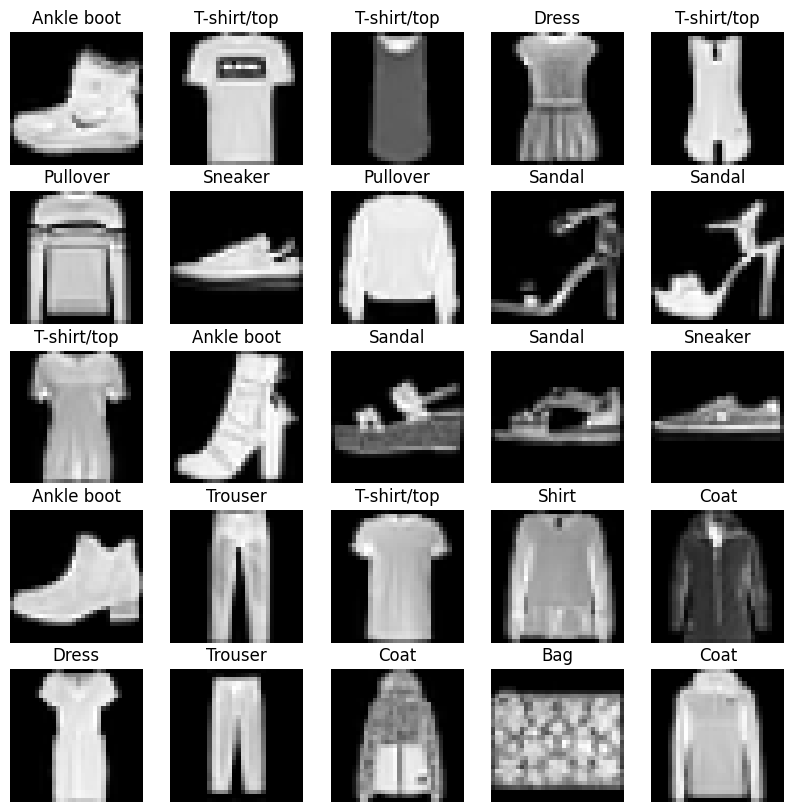

In [6]:
import matplotlib.pyplot as plt

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting 25 images from x_train
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i].numpy().squeeze(), cmap='gray')
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')

plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),  # Updated input shape
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,466 (888.54 KB)

 Trainable params: 227,018 (886.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [3]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7710 - loss: 0.6541 - val_accuracy: 0.8775 - val_loss: 0.3379
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8788 - loss: 0.3321 - val_accuracy: 0.8907 - val_loss: 0.2957
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8931 - loss: 0.2841 - val_accuracy: 0.8855 - val_loss: 0.3055
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9054 - loss: 0.2544 - val_accuracy: 0.8917 - val_loss: 0.3131
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9125 - loss: 0.2357 - val_accuracy: 0.9074 - val_loss: 0.2685
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9197 - loss: 0.2167 - val_accuracy: 0.8985 - val_loss: 0.2802
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9283 - loss: 0.1944 - val_accuracy: 0.8718 - val_loss: 0.3931
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9277 - loss: 0.1861 - val_accuracy: 0

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the data generator to the training data
datagen.fit(x_train)

# Train with augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.8188 - loss: 0.5349 - val_accuracy: 0.9066 - val_loss: 0.2557
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8635 - loss: 0.3745 - val_accuracy: 0.9010 - val_loss: 0.2731
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.8724 - loss: 0.3498 - val_accuracy: 0.8916 - val_loss: 0.2946
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - accuracy: 0.8794 - loss: 0.3356 - val_accuracy: 0.8783 - val_loss: 0.3233
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.8806 - loss: 0.3247 - val_accuracy: 0.9060 - val_loss: 0.2530
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8835 - loss: 0.3188 - val_accuracy: 0.8809 - val_loss: 0.3446
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8874 - loss: 0.3091 - val_accuracy: 0.8966 - val_loss: 0.2801
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.8895 - loss: 0.3066 - val_accurac

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9118 - loss: 0.2666
Test accuracy: 0.9100000262260437


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image 1 is correctly classified as 2.


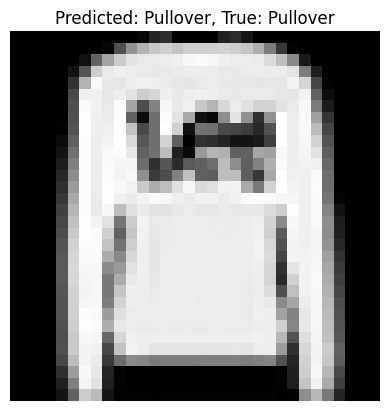

In [7]:
import numpy as np

# Choose an image (e.g., the first image in the test set)
image_index = 1
image = x_test[image_index: image_index + 1]  # Get a batch of one image

# Make a prediction
predicted_label = np.argmax(model.predict(image), axis=1)
true_label = np.argmax(y_test[image_index])

# Display the result
if predicted_label == true_label:
    print(f"Image {image_index} is correctly classified as {predicted_label[0]}.")
else:
    print(f"Image {image_index} is misclassified. Predicted: {predicted_label[0]}, True: {true_label}")

# Display the image with the prediction and true label
plt.imshow(x_test[image_index].numpy().squeeze(), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image 18 is correctly classified as 8.


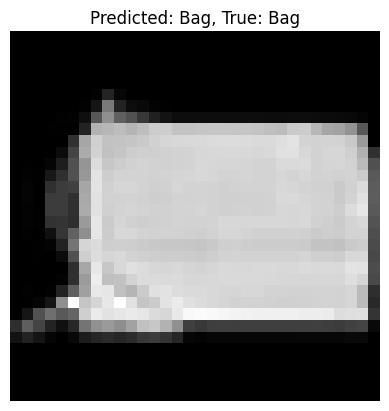

In [8]:
import numpy as np

# Choose an image (e.g., the first image in the test set)
image_index = 18
image = x_test[image_index: image_index + 1]  # Get a batch of one image

# Make a prediction
predicted_label = np.argmax(model.predict(image), axis=1)
true_label = np.argmax(y_test[image_index])

# Display the result
if predicted_label == true_label:
    print(f"Image {image_index} is correctly classified as {predicted_label[0]}.")
else:
    print(f"Image {image_index} is misclassified. Predicted: {predicted_label[0]}, True: {true_label}")

# Display the image with the prediction and true label
plt.imshow(x_test[image_index].numpy().squeeze(), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image 2 is correctly classified as 1.


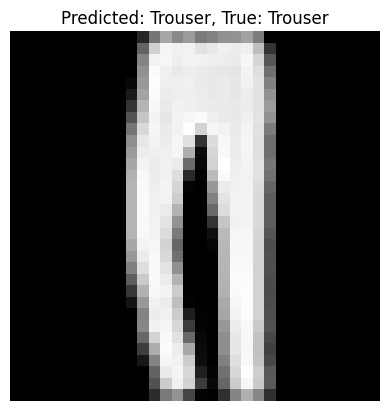

In [9]:
import numpy as np

# Choose an image (e.g., the first image in the test set)
image_index = 2
image = x_test[image_index: image_index + 1]  # Get a batch of one image

# Make a prediction
predicted_label = np.argmax(model.predict(image), axis=1)
true_label = np.argmax(y_test[image_index])

# Display the result
if predicted_label == true_label:
    print(f"Image {image_index} is correctly classified as {predicted_label[0]}.")
else:
    print(f"Image {image_index} is misclassified. Predicted: {predicted_label[0]}, True: {true_label}")

# Display the image with the prediction and true label
plt.imshow(x_test[image_index].numpy().squeeze(), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label[0]]}, True: {class_names[true_label]}")
plt.axis('off')
plt.show()
